# Lab Assignment Five: Wide and Deep Network Architectures
Created by the **Dream Team:** Daniel Ryan, Josh Hascall, and Zach Suzuki

## Preparation (4 points)

In [1]:
import pandas as pd
import numpy as np

headers = ['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class', 'flight_distance', 
           'inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location',
           'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'onboard_service',
           'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 
           'departure_delay_in_minutes', 'arrival_delay_in_minutes', 'satisfaction']
df_orig = pd.read_csv('APS.csv', index_col=1,names=headers, header=0)
df_orig = df_orig.drop(['id'], axis=1)

Since there are only a small amount of rows with missing data, lets just drop those rows.

In [2]:
from copy import deepcopy

df = deepcopy(df_orig) #will preserve df_orig

df.replace(to_replace=' ?', value=np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103594 non-null  object 
 1   customer_type                      103594 non-null  object 
 2   age                                103594 non-null  int64  
 3   type_of_travel                     103594 non-null  object 
 4   class                              103594 non-null  object 
 5   flight_distance                    103594 non-null  int64  
 6   inflight_wifi_service              103594 non-null  int64  
 7   departure_arrival_time_convenient  103594 non-null  int64  
 8   ease_of_online_booking             103594 non-null  int64  
 9   gate_location                      103594 non-null  int64  
 10  food_and_drink                     103594 non-null  int64  
 11  online_boarding                    1035

#### [1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

encoders = dict()
categorical_headers = ['gender', 'customer_type', 'type_of_travel', 'class']

for col in categorical_headers+['satisfaction']:
    
    if(df[col].dtype == 'object'):
        print(col)
        df[col] = df[col].str.strip()

        if col=="satisfaction":
            tmp = LabelEncoder()
            df[col] = tmp.fit_transform(df[col])
        else:
            encoders[col] = LabelEncoder() # save the encoder
            df[col+'_int'] = encoders[col].fit_transform(df[col])
                                                      

numeric_headers = ["age", "flight_distance", "departure_delay_in_minutes", "arrival_delay_in_minutes"]

ss = StandardScaler()
df[numeric_headers] = ss.fit_transform(df[numeric_headers].values)

print(df.satisfaction.value_counts())
df.head()

gender
customer_type
type_of_travel
class
satisfaction
0    58697
1    44897
Name: satisfaction, dtype: int64


,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,gender_int,customer_type_int,type_of_travel_int,class_int
0,Male,Loyal Customer,-1.745542,Personal Travel,Eco Plus,-0.731305,3,4,3,1,...,4,5,5,0.268966,0.072905,0,1,0,1,2
1,Male,disloyal Customer,-0.951526,Business travel,Business,-0.956916,3,2,3,3,...,1,4,1,-0.360682,-0.237184,0,1,1,0,0
2,Female,Loyal Customer,-0.885358,Business travel,Business,-0.047454,2,2,2,2,...,4,4,5,-0.386917,-0.392229,1,0,0,0,0
3,Female,Loyal Customer,-0.951526,Business travel,Business,-0.629028,2,5,5,5,...,1,4,2,-0.098328,-0.159662,0,0,0,0,0
4,Male,Loyal Customer,1.430521,Business travel,Business,-0.977973,3,3,3,3,...,3,3,3,-0.386917,-0.392229,1,1,0,0,0


#### [1 points] Identify groups of features in your data that should be combined into cross-product features. Provide justification for why these features should be crossed (or why some features should not be crossed).



#### Based on our intuition and our research into the airline business, we believe that the following classes make the most sense to combine into cross product features:


**1. customer type, leg room service, food and drink, seat comfort**

    Class should say a lot about the quality of leg room and F&B a customer receives. Using cross-product here makes a lot of sense because I care if a business class passenger had a poor leg room rating vs. an economy class passenger.

**2. type of travel, gate location, baggage handling**

    We believe that passengers who travel for business are more likely to factor their location and satisfaction with baggage handling in to their overall satisfaction than those who are personally travelling.

**3. class, cleanliness, onboard service**

    a. Customers who pay more for their tickets should have higher expectations for service and cleanliness than others and we believe this will factor more into their satisfaction.
    b. From a more business-oriented perspective, we should strive to create value for our higher class customers, and therefore we care that our higher class passengers are receiving the best possible service
 
We do not believe some features like wifi or online boarding satisfaction should be crossed, because as far as we know, every passenger has the same experience with this, regardless of any other categorical factors. 

In [5]:
# columns have to be strings, so here i convert all the numerical ratings to string types 

cols = ['leg_room_service', 'food_and_drink', 'type_of_travel', 'gate_location','inflight_entertainment', 'cleanliness', 'seat_comfort', 'baggage_handling','onboard_service']
for col in cols:
    df[col+'_str'] = df[col].astype(str)


cross_columns = [['customer_type', 'leg_room_service_str','food_and_drink_str', 'seat_comfort_str'],
                 ['type_of_travel','gate_location_str', 'baggage_handling_str'],
                 ['class','cleanliness_str','onboard_service_str']
                ]

# cross each set of columns in the list above
cross_col_df_names = []
for cols_list in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed = df[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(X_crossed.to_numpy())
    
    # 3. Save into dataframe with new name
    df[cross_col_name] = enc.transform(X_crossed)
    
    # Save the encoder used here for later:
    encoders[cross_col_name] = enc
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['customer_type_leg_room_service_str_food_and_drink_str_seat_comfort_str',
 'type_of_travel_gate_location_str_baggage_handling_str',
 'class_cleanliness_str_onboard_service_str']

#### [1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

Let's quickly do some definitions so we're on the same page:
- **True positive**
    - We predict a passenger is satisfied, and they are!
- **True negative**
    - We predict a passenger is dissatisfied, and they are! :(
- **False Positive**
    - We predict a passenger is satisfied, and we are wrong. They are dissatisfied!
    - Considering our business case, we absolutely want to avoid this!
- **False negative**
    - We predict a passenger is dissatisfied, but they are actually satisfied

We think our audience, for the purpose of this analysis wants to find dissatisfied passengers. If they were unhappy with their flight, there is a high likleihood they will use our airline less and or speak ill of the brand. We think the expected value of an unsatisfied passenger is highly negative, so we will try to identify these passengers and amend our errors to keep them loyal and happy.

Therefore, we are not equally concerned with all of the outputs for this prediction problem, and accuracy would be an inferior metric. We are substantially more interested in experiences we expected to be satisfactory that turned out to be unsatisfactory (False Positives).

Because of this, we believe the most important evaluation criterion should be precision, which does not factor in false negatives but TP, and FP.

#### [1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice.

In [6]:
len(df[df['satisfaction'] == 1])/len(df)

0.4333938258972527

**Method: 80/20 split**

Why? According to the Dr. Larson scale, our dataset with more than 100,000 instances is a large dataset. Further, as evidenced above, the split between satisfied and dissatisfied is roughly equal, we run a low class imbalance. Therefore, we run a low risk that we will data snoop or miss training or testing a wide variety of instances.

In [7]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)

In [8]:
categorical_headers_ints = ['gender_int', 'customer_type_int', 'type_of_travel_int', 'class_int',  
           'inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location',
           'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'onboard_service',
           'leg_room_service', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']

feature_columns = categorical_headers_ints+numeric_headers+cross_col_df_names

import pprint
pp = pprint.PrettyPrinter(indent=4)

print(f"We will use the following {len(feature_columns)} features:")
pp.pprint(feature_columns)

# combine the features into a single large matrix
X_train = df_train[feature_columns].to_numpy()
X_test = df_test[feature_columns].to_numpy()

y_train = df_train['satisfaction'].values.astype(np.int32)
y_test = df_test['satisfaction'].values.astype(np.int32)

We will use the following 25 features:
[   'gender_int',
    'customer_type_int',
    'type_of_travel_int',
    'class_int',
    'inflight_wifi_service',
    'departure_arrival_time_convenient',
    'ease_of_online_booking',
    'gate_location',
    'food_and_drink',
    'online_boarding',
    'seat_comfort',
    'inflight_entertainment',
    'onboard_service',
    'leg_room_service',
    'baggage_handling',
    'checkin_service',
    'inflight_service',
    'cleanliness',
    'age',
    'flight_distance',
    'departure_delay_in_minutes',
    'arrival_delay_in_minutes',
    'customer_type_leg_room_service_str_food_and_drink_str_seat_comfort_str',
    'type_of_travel_gate_location_str_baggage_handling_str',
    'class_cleanliness_str_onboard_service_str']


## Modeling (5 points)

In [9]:
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import AUC, Precision, FalsePositives, TruePositives

2022-11-21 06:17:33.083875: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-21 06:17:33.264689: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-21 06:17:33.264729: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-21 06:17:33.289981: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-21 06:17:34.058431: W tensorflow/stream_executor/pla

In [10]:
# Now let's define the architecture for a multi-layer network

# First, lets setup the input size
num_features = X_train.shape[1]
input_tensor = Input(shape=(num_features,))

# a layer instance is callable on a tensor, and returns a tensor
# Dense means a fully connected layer, with 10 hidden neurons and a bias term
x = Dense(units=10, activation='relu')(input_tensor)
x = Dense(units=5, activation='tanh')(x)
predictions = Dense(1, activation='sigmoid')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=input_tensor, outputs=predictions)

2022-11-21 06:17:35.158752: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-21 06:17:35.158787: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-21 06:17:35.158808: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-c7301193-a873-4a66-877a-df44c1d7f363): /proc/driver/nvidia/version does not exist
2022-11-21 06:17:35.159033: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### [2 points] Create at least three combined wide and deep networks to classify your data using Keras. Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. Note: use the "history" return parameter that is part of Keras "fit" function to easily access this data.

#### [2 points] Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two different number of layers. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to select the number of layers that performs superiorly.

In [11]:
X_train_cat = df_train[categorical_headers_ints].to_numpy() 
X_test_cat = df_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
X_train_num =  df_train[numeric_headers].to_numpy()
X_test_num = df_test[numeric_headers].to_numpy()

X_train_crossed = df_train[cross_col_df_names].to_numpy()
X_test_crossed = df_test[cross_col_df_names].to_numpy()

In [12]:
def WDN(cross_headers,cat_headers,num_headers,num_layers,use_wide=True):
    # save categorical features
    X_train_cat = df_train[cat_headers].to_numpy() 
    X_test_cat = df_test[cat_headers].to_numpy() 

    # and save off the numeric features
    X_train_num =  df_train[num_headers].to_numpy()
    X_test_num = df_test[num_headers].to_numpy()
    
    if use_wide:
        # get crossed columns
        X_train_crossed = df_train[cross_headers].to_numpy()
        X_test_crossed = df_test[cross_headers].to_numpy()

        # we need to create separate lists for each branch
        crossed_outputs = []

        # CROSSED DATA INPUT
        input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
        for idx,col in enumerate(cross_headers):
        
            # track what the maximum integer value will be for this variable
            # which is the same as the number of categories
            N = max(df_train[col].max(),df_test[col].max())+1
            N = len(encoders[col].classes_)
            N_reduced = int(np.sqrt(N))
        
        
            # this line of code does this: input_branch[:,idx]
            x = tf.gather(input_crossed, idx, axis=1)
        
            # now use an embedding to deal with integers as if they were one hot encoded
            x = Embedding(input_dim=N, 
                    output_dim=N_reduced, 
                    input_length=1, name=col+'_embed')(x)
        
            # save these outputs to concatenate later
            crossed_outputs.append(x)
        

        # now concatenate the outputs and add a fully connected layer
        wide_branch = concatenate(crossed_outputs, name='wide_concat')

    # reset this input branch
    all_deep_branch_outputs = []

    # CATEGORICAL DATA INPUT
    input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
    for idx,col in enumerate(cat_headers):
        
        # track what the maximum integer value will be for this variable
        # which is the same as the number of categories
        N = max(df_train[col].max(),df_test[col].max())+1
        N_reduced = int(np.sqrt(N))
        
        # this line of code does this: input_branch[:,idx]
        x = tf.gather(input_cat, idx, axis=1)
        
        # now use an embedding to deal with integers as if they were one hot encoded
        x = Embedding(input_dim=N, 
                    output_dim=N_reduced, 
                    input_length=1, name=col+'_embed')(x)
        
        # save these outputs to concatenate later
        all_deep_branch_outputs.append(x)
        
    # NUMERIC DATA INPUT
    # create dense input branch for numeric
    input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
    x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
        
    all_deep_branch_outputs.append(x_dense)


    # merge the deep branches together
    deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
    for layers in range(num_layers):
        deep_branch = Dense(units=deep_branch.shape[1]/3*2,activation='relu', name='deep' + str(layers))(deep_branch)
        
    # merge the deep and wide branch
    final_branch = deep_branch
    if use_wide:
        final_branch = concatenate([wide_branch, deep_branch],
                                name='concat_deep_wide')
    final_branch = Dense(units=1,activation='sigmoid',
                        name='combined')(final_branch)

    if use_wide:
        model = Model(inputs=[input_crossed,input_cat,input_num], 
                outputs=final_branch)
    else:
        model = Model(inputs=[input_cat,input_num], 
                outputs=final_branch)
    
    return model

In [13]:
%%time

model3 = WDN(cross_col_df_names, categorical_headers_ints, numeric_headers, 3, use_wide=True)
model3.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['AUC', 'Precision', 'FalsePositives', 'TruePositives'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history3 = model3.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=20, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

yhat3 = np.round(model3.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat3))
print(mt.classification_report(y_test,yhat3))

Epoch 1/20
2590/2590 [==============================] - 14s 5ms/step - loss: 0.2458 - auc: 0.6584 - precision: 0.5397 - false_positives: 19200.0000 - true_positives: 22514.0000 - val_loss: 0.2414 - val_auc: 0.7449 - val_precision: 0.6975 - val_false_positives: 1974.0000 - val_true_positives: 4551.0000
Epoch 2/20
2590/2590 [==============================] - 12s 5ms/step - loss: 0.2373 - auc: 0.7790 - precision: 0.7576 - false_positives: 5871.0000 - true_positives: 18350.0000 - val_loss: 0.2332 - val_auc: 0.8050 - val_precision: 0.7846 - val_false_positives: 1276.0000 - val_true_positives: 4647.0000
Epoch 3/20
2590/2590 [==============================] - 12s 5ms/step - loss: 0.2287 - auc: 0.8102 - precision: 0.7917 - false_positives: 5105.0000 - true_positives: 19398.0000 - val_loss: 0.2244 - val_auc: 0.8199 - val_precision: 0.7933 - val_false_positives: 1314.0000 - val_true_positives: 5043.0000
Epoch 4/20
2590/2590 [==============================] - 11s 4ms/step - loss: 0.2198 - auc: 0.

Use statistical tests

In [14]:
%%time

model2 = WDN(cross_col_df_names, categorical_headers_ints, numeric_headers, 2, use_wide=True)
model2.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['AUC', 'Precision', 'FalsePositives', 'TruePositives'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history2 = model2.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=20, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

yhat2 = np.round(model2.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat2))
print(mt.classification_report(y_test,yhat2))

Epoch 1/20
2590/2590 [==============================] - 13s 4ms/step - loss: 0.2379 - auc: 0.6851 - precision: 0.8571 - false_positives: 30.0000 - true_positives: 180.0000 - val_loss: 0.2317 - val_auc: 0.7385 - val_precision: 0.9806 - val_false_positives: 3.0000 - val_true_positives: 152.0000
Epoch 2/20
2590/2590 [==============================] - 11s 4ms/step - loss: 0.2259 - auc: 0.7537 - precision: 0.9807 - false_positives: 95.0000 - true_positives: 4819.0000 - val_loss: 0.2212 - val_auc: 0.7639 - val_precision: 0.9683 - val_false_positives: 79.0000 - val_true_positives: 2414.0000
Epoch 3/20
2590/2590 [==============================] - 11s 4ms/step - loss: 0.2161 - auc: 0.7751 - precision: 0.9484 - false_positives: 667.0000 - true_positives: 12247.0000 - val_loss: 0.2121 - val_auc: 0.7837 - val_precision: 0.9250 - val_false_positives: 282.0000 - val_true_positives: 3480.0000
Epoch 4/20
2590/2590 [==============================] - 11s 4ms/step - loss: 0.2069 - auc: 0.7969 - precision

In [15]:
%%time

model1 = WDN(cross_col_df_names, categorical_headers_ints, numeric_headers, 1, use_wide=True)
model1.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['AUC', 'Precision', 'FalsePositives', 'TruePositives'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history1 = model1.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=20, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

yhat1 = np.round(model1.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat1))
print(mt.classification_report(y_test,yhat1))

Epoch 1/20
2590/2590 [==============================] - 13s 5ms/step - loss: 0.2300 - auc: 0.6890 - precision: 0.7795 - false_positives: 2021.0000 - true_positives: 7145.0000 - val_loss: 0.2236 - val_auc: 0.7276 - val_precision: 0.8034 - val_false_positives: 720.0000 - val_true_positives: 2942.0000
Epoch 2/20
2590/2590 [==============================] - 12s 5ms/step - loss: 0.2171 - auc: 0.7490 - precision: 0.7939 - false_positives: 3644.0000 - true_positives: 14038.0000 - val_loss: 0.2122 - val_auc: 0.7623 - val_precision: 0.7969 - val_false_positives: 987.0000 - val_true_positives: 3872.0000
Epoch 3/20
2590/2590 [==============================] - 11s 4ms/step - loss: 0.2058 - auc: 0.7793 - precision: 0.7970 - false_positives: 4268.0000 - true_positives: 16754.0000 - val_loss: 0.2010 - val_auc: 0.7905 - val_precision: 0.7987 - val_false_positives: 1134.0000 - val_true_positives: 4498.0000
Epoch 4/20
2590/2590 [==============================] - 11s 4ms/step - loss: 0.1941 - auc: 0.8087

#### [1 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). For classification tasks, compare using the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations.  Use proper statistical methods to compare the performance of different models.

In [16]:
%%time

model_no_wide = WDN(cross_col_df_names, categorical_headers_ints, numeric_headers, 3, use_wide=False)
model_no_wide.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['AUC', 'Precision', 'FalsePositives', 'TruePositives'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history_no_wide = model_no_wide.fit([X_train_cat,X_train_num],
                    y_train, 
                    epochs=20, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_cat,X_test_num],y_test))

yhat0 = np.round(model_no_wide.predict([X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat0))
print(mt.classification_report(y_test,yhat0))

Epoch 1/20
2590/2590 [==============================] - 15s 5ms/step - loss: 0.2372 - auc: 0.6623 - precision: 0.6897 - false_positives: 3028.0000 - true_positives: 6730.0000 - val_loss: 0.2307 - val_auc: 0.6966 - val_precision: 0.7311 - val_false_positives: 900.0000 - val_true_positives: 2447.0000
Epoch 2/20
2590/2590 [==============================] - 11s 4ms/step - loss: 0.2241 - auc: 0.7133 - precision: 0.7304 - false_positives: 4276.0000 - true_positives: 11585.0000 - val_loss: 0.2185 - val_auc: 0.7253 - val_precision: 0.7302 - val_false_positives: 1258.0000 - val_true_positives: 3405.0000
Epoch 3/20
2590/2590 [==============================] - 12s 5ms/step - loss: 0.2114 - auc: 0.7455 - precision: 0.7363 - false_positives: 5353.0000 - true_positives: 14950.0000 - val_loss: 0.2057 - val_auc: 0.7597 - val_precision: 0.7426 - val_false_positives: 1387.0000 - val_true_positives: 4001.0000
Epoch 4/20
2590/2590 [==============================] - 11s 4ms/step - loss: 0.1959 - auc: 0.790

We will combine all of our runnings into one clean, multi-chart chunk! 

Instead of using the SKLearn AUC that was demonstrated in the flipped module, we found an AUC calculation native to keras and we are using that.

Text(0.5, 0, 'epochs')

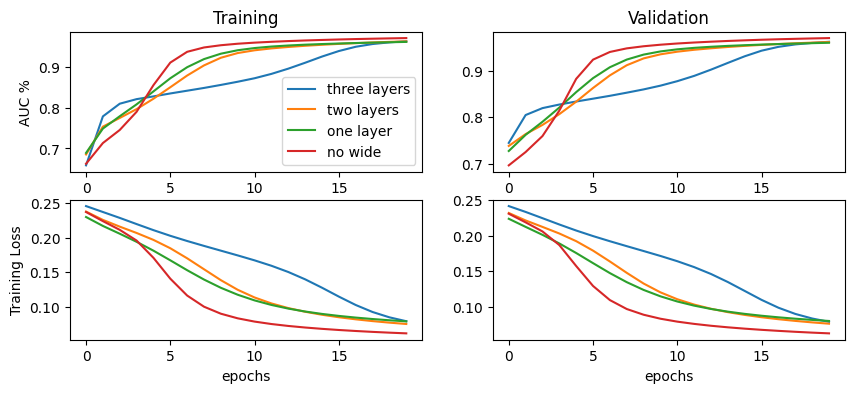

In [17]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history3.history['auc'], label="three layers")
plt.plot(history2.history['auc'], label="two layers")
plt.plot(history1.history['auc'], label="one layer")
plt.plot(history_no_wide.history['auc'], label="no wide")
plt.legend()

plt.ylabel('AUC %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history3.history['val_auc'], label="three layers")
plt.plot(history2.history['val_auc'], label="two layers")
plt.plot(history1.history['val_auc'], label="one layer")
plt.plot(history_no_wide.history['val_auc'], label="no wide")
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history3.history['loss'], label="three layers")
plt.plot(history2.history['loss'], label="two layers")
plt.plot(history1.history['loss'], label="pne layer")
plt.plot(history_no_wide.history['loss'], label="no wide")
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history3.history['val_loss'], label="three layers")
plt.plot(history2.history['val_loss'], label="two layers")
plt.plot(history1.history['val_loss'], label="one layer")
plt.plot(history_no_wide.history['val_loss'], label="no wide")
plt.xlabel('epochs')

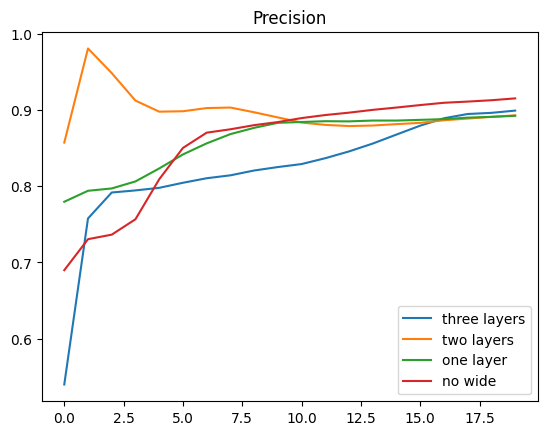

In [18]:
plt.title("Precision")
plt.plot(history3.history['precision'], label="three layers")
plt.plot(history2.history['precision'], label="two layers")
plt.plot(history1.history['precision'], label="one layer")
plt.plot(history_no_wide.history['precision'], label="no wide")
plt.legend()
plt.show()

We are extremely suprised by these results! While it would have been beneficial to run our networks for more than 20 epochs, the results seem relatively clear: the no-wide network performs superior to the others!

We believe there are two possible explanations:
    1. we chose bad cross-categories
    2. There aren't very many patterns that the wide network can memorize and use to influence decisions.

There is something else worth some analysis, the no-wide network starts from lower performance in all three metrics (except precision) that we analyze. It appears that the improvement in the first few epochs is much higher than the other multi-layer wide and deep networks. However, it appears that the three layer network may have a steeper curve, and could surpass the deep only with enough epochs. We feel that for the most part, the loss function has converged for all functions so we will not change it.

We will analyze the performance of this network against a standard SKLearn MLP:

In [19]:
# Test using a multi-layer perceptron
from sklearn import __version__ as sklearn_version
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score

print(sklearn_version)
# these values have been hand tuned
clf = MLPClassifier(hidden_layer_sizes=(50, ), 
                    activation='logistic', # compare to sigmoid
                    solver='sgd', 
                    alpha=1e-4, # L2 penalty
                    batch_size=32, # min of 200, num_samples
                    learning_rate='adaptive', # decrease rate if loss goes up
                    learning_rate_init=0.1, # only SGD
                    power_t=0.5,    # only SGD with inverse scaling
                    max_iter=75, 
                    shuffle=True, 
                    random_state=1, 
                    tol=1e-9, # for stopping
                    verbose=False, 
                    warm_start=False, 
                    momentum=0.9, # only SGD
                    nesterovs_momentum=True, # only SGD
                    early_stopping=False, 
                    validation_fraction=0.1, # only if early_stop is true
                    beta_1=0.9, # adam decay rate of moment
                    beta_2=0.999, # adam decay rate of moment
                    epsilon=1e-08) # adam numerical stabilizer

feature_columns = categorical_headers_ints+numeric_headers

X_train = df_train[feature_columns].to_numpy()
X_test = df_test[feature_columns].to_numpy()

y_train = df_train['satisfaction'].values.astype(np.int32)
y_test = df_test['satisfaction'].values.astype(np.int32)

clf.fit(X_train, y_train)

yhat = clf.predict(X_test)
print('Validation Precision:',precision_score(yhat,y_test))

1.1.2
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
Validation Precision: 0.9447661469933185


This model has a precision score of 94.5%, which far outpaces all of our models unfortunately. This could be due to unoptimized crossed categories for our wide network, making the potential for this model to still be worth iterating on.

But this does seem to confirm that a non-wide network will perform better with the dataset we have given it. It's likely that it is due to our decisions in preprocessing, but it is also possible that this dataset is not one that benefits from the useage of wide networks!

Given the very similar results between most networks (~91% precision in all) We are unsure if there is even a meaningful difference in performance between the four models. Let's see if the model with three deep layers and two deep layers are statistically different from one another. We're going to use mcnemar statistical tests to confirm or reject this hypothesis:

In [52]:
yhat3 = np.round(model3.predict([X_test_crossed,X_test_cat,X_test_num]))
yhat2 = np.round(model2.predict([X_test_crossed,X_test_cat,X_test_num]))
yhat1 = np.round(model1.predict([X_test_crossed,X_test_cat,X_test_num]))
yhat0 = np.round(model_no_wide.predict([X_test_cat,X_test_num]))

648/648 [==============================] - 1s 2ms/step


In [62]:
from statsmodels.stats.contingency_tables import mcnemar
conf = mt.confusion_matrix(yhat2,yhat3)
print(mcnemar(conf, exact=False))
print(conf)

pvalue      0.43382651533315775
statistic   0.6125574272588055
[[11439   316]
 [  337  8627]]


Not different, and not surprising

In [56]:
conf = mt.confusion_matrix(yhat3,yhat1)
print(mcnemar(conf, exact=False))

pvalue      0.9068979510705434
statistic   0.013677811550151976


Definitely not different

In [57]:
conf = mt.confusion_matrix(yhat3,yhat0)
print(mcnemar(conf, exact=False))

pvalue      0.04599936687503688
statistic   3.9816176470588234


As we could see, and as is confirmed by the test, the non-wide network is statistically signifigantly different from the three layer!

In [58]:
conf = mt.confusion_matrix(yhat2,yhat1)
print(mcnemar(conf, exact=False))

pvalue      0.4429975194137201
statistic   0.5885057471264368


In [59]:
conf = mt.confusion_matrix(yhat2,yhat0)
print(mcnemar(conf, exact=False))

pvalue      0.18600402378746622
statistic   1.7489878542510122


Surprised this isn't signifigantly different

In [60]:
conf = mt.confusion_matrix(yhat1,yhat0)
print(mcnemar(conf, exact=False))

pvalue      0.061276493730619545
statistic   3.502493765586035


In [63]:
conf = mt.confusion_matrix(yhat0,yhat)
print(mcnemar(conf, exact=False))

pvalue      0.8132655005442844
statistic   0.05579773321708806


We are very surprised by this! Even though the precision is higher in the MLP from SKLearn by a few hundred basis points, this test is saying the models are not statistically different!

## Exceptional Work (1 point)

For exceptional work, we added an implementation of a network without the wide portion (just a deep network) with additional analysis comparing it against the 3 wide and deep networks and a typical Multi-Layer Perceptron. This analysis is shown above in the validation and training curves, as well as in the McNemar tests. Both the MLP and the Deep network seem to perform significantly better than our 3 wide and deep networks.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c7301193-a873-4a66-877a-df44c1d7f363' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>